In [1]:
# Import required package and libraries

import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the raw file
rawCarDF = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
# Check first few rows of the raw dataframe
rawCarDF.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Check the shape(rows and columns) of the raw data
print(rawCarDF.shape)

# Generic information of each column
print(rawCarDF.info())

# Basic column statistics for all numeric columns
print(rawCarDF.describe())

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
pea

# Understanding Data

#### Analysis of numerical columns

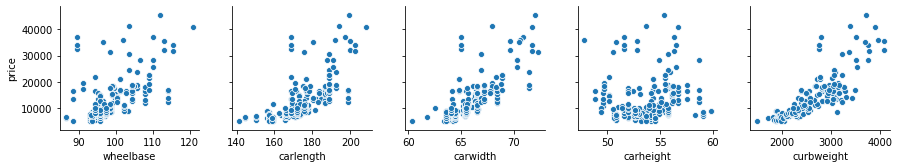

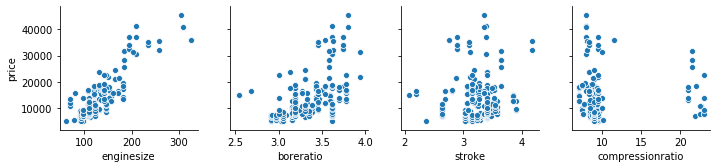

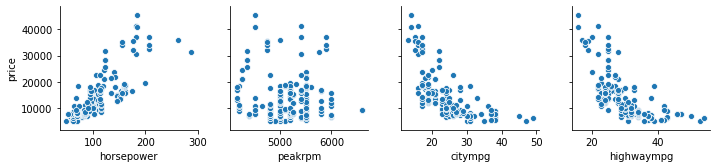

In [5]:
sns.pairplot(data=rawCarDF, x_vars=['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight'], \
            y_vars=['price'])
plt.show()
sns.pairplot(data=rawCarDF, x_vars=['enginesize', 'boreratio', 'stroke', 'compressionratio'], \
            y_vars=['price'])
plt.show()
sns.pairplot(data=rawCarDF, x_vars=['horsepower', 'peakrpm', 'citympg', 'highwaympg'], \
            y_vars=['price'])
plt.show()

#### From the above charts it looks like that price varies with the columns horsepower, enginesize, curbweight, carwidth, carlength. <br> It also looks like there are non-linear relationships of price with the columns like wheelbase, boreratio, citympg and highwaympg.

#### Analysis of Categorical columns

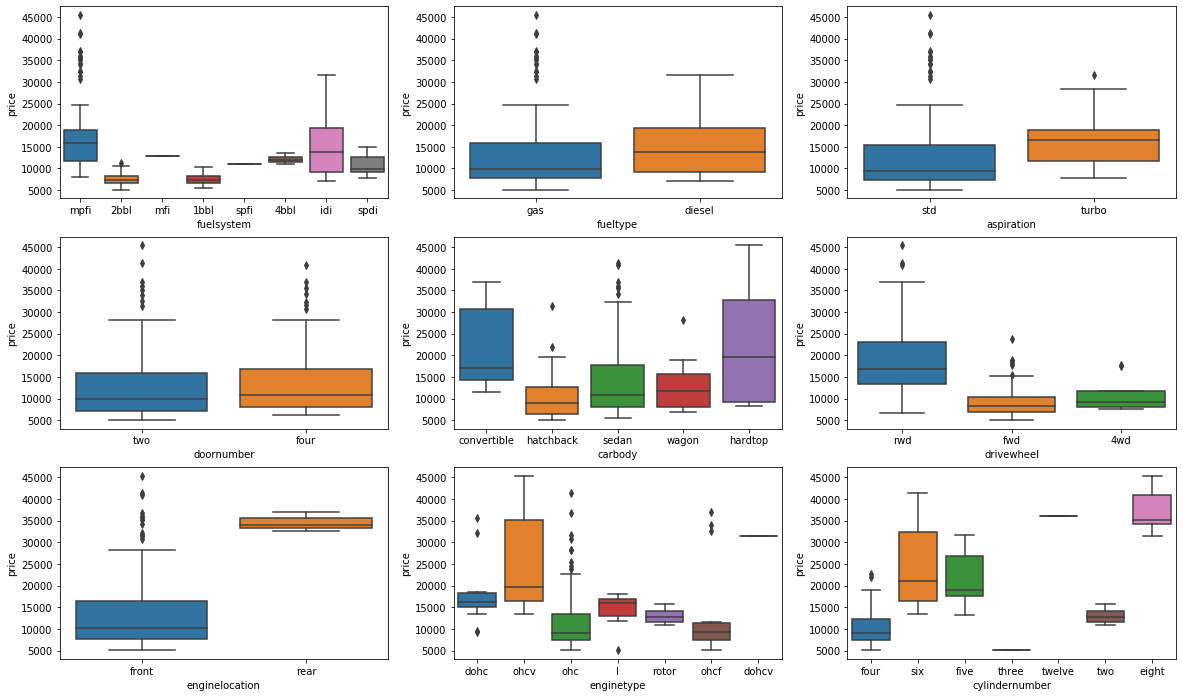

In [6]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
#sns.boxplot(x = 'carCompany', y = 'price', data = rawCar)
sns.boxplot(x = 'fuelsystem', y = 'price', data = rawCarDF)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = rawCarDF)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = rawCarDF)
plt.subplot(3,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = rawCarDF)
plt.subplot(3,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = rawCarDF)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = rawCarDF)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = rawCarDF)
plt.subplot(3,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = rawCarDF)
plt.subplot(3,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = rawCarDF)

plt.show()

#### Few insights that are evident from the above chrts:
- Rear wheel engine drive location are costliest
- Convertible and hardtop cars are costliest and hatchback are cheapest
- Diesel engine cars are relatively costlier than that of gas engine
- Cars with "turbo" engines are costlier than that of "std" engines
- Cars with "ohcv" engine type are costliest
- Eight cylinder engines are costliest and four cylinder engines are cheapest
- Doornumber doesn't affect much in deciding price of a car

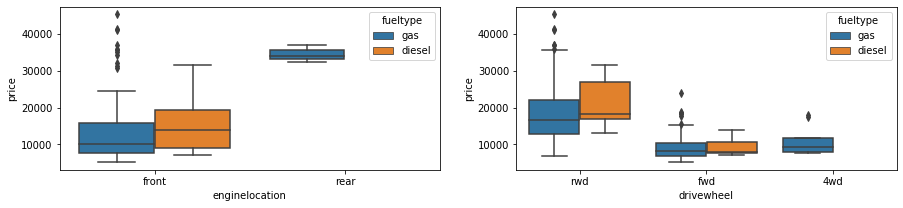

In [7]:
plt.figure(figsize = (15, 3))
plt.subplot(1,2,1)
sns.boxplot(x = 'enginelocation', y = 'price', hue = 'fueltype', data = rawCarDF)
plt.subplot(1,2,2)
sns.boxplot(x = 'drivewheel', y = 'price', hue = 'fueltype', data = rawCarDF)
plt.show()

#### Few insights that are evident from the above charts:
- If engine is at the front then diesel engines are costlier
- All rear engine cars run on gas and are much costlier than front engine type cars
- All 4 wheel drive engine cars run on gas only
- Rear wheel drive with diesel engines are much costlier than that of gas engines

# Data preparation

In [8]:
rawCarDF['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [9]:
rawCarDF['CarName'] = rawCarDF['CarName'].apply(lambda car: car.split()[0])

In [10]:
rawCarDF['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### Data cleansing for car name column

In [11]:
carName_translation = {'vw':'volkswagen', 'vokswagen':'volkswagen', 'toyouta':'toyota', \
                      'porcshce':'porsche', 'Nissan':'nissan', 'maxda':'mazda'}

rawCarDF['CarName'] = rawCarDF['CarName'].map(lambda car:carName_translation[car] \
                                                if car in carName_translation else car)
rawCarDF['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#### Data sanity check for other Categorical columns

In [12]:
print(rawCarDF['symboling'].unique())
print(rawCarDF['fueltype'].unique())
print(rawCarDF['aspiration'].unique())
print(rawCarDF['doornumber'].unique())
print(rawCarDF['carbody'].unique())
print(rawCarDF['drivewheel'].unique())
print(rawCarDF['enginelocation'].unique())
print(rawCarDF['enginetype'].unique())
print(rawCarDF['cylindernumber'].unique())
print(rawCarDF['fuelsystem'].unique())

[ 3  1  2  0 -1 -2]
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


#### Changing Categorical column to Numerical column

In [13]:
rawCarDF['fueltype'] = rawCarDF['fueltype'].map(lambda fueltype: 1 if fueltype == 'gas' else 0)
rawCarDF['aspiration'] = rawCarDF['aspiration'].map(lambda aspiration: 1 if aspiration == 'std' else 0)
rawCarDF['doornumber'] = rawCarDF['doornumber'].map(lambda doornumber: 1 if doornumber == 'two' else 0)
rawCarDF['enginelocation'] = rawCarDF['enginelocation'].map(lambda enginelocation: 1 if enginelocation == 'front' else 0)

#### Dummy Variable Creation

In [14]:
# Dataframes with dummy variables
d_carbody = pd.get_dummies(rawCarDF['carbody'], drop_first = True)
d_drivewheel = pd.get_dummies(rawCarDF['drivewheel'], drop_first = True)
d_enginetype = pd.get_dummies(rawCarDF['enginetype'], drop_first = True)
d_cylindernumber = pd.get_dummies(rawCarDF['cylindernumber'], drop_first = True)
d_fuelsystem = pd.get_dummies(rawCarDF['fuelsystem'], drop_first = True)

# Concatenate with main dataframe
carDF = pd.concat([rawCarDF, d_carbody, d_drivewheel, d_enginetype, d_cylindernumber, d_fuelsystem], \
                 axis=1)

#### Drop Original Categorical Columns

In [15]:
carDF.drop(['carbody'], axis = 1, inplace = True)
carDF.drop(['drivewheel'], axis = 1, inplace = True)
carDF.drop(['enginetype'], axis = 1, inplace = True)
carDF.drop(['cylindernumber'], axis = 1, inplace = True)
carDF.drop(['fuelsystem'], axis = 1, inplace = True)

carDF.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,alfa-romero,1,1,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero,1,1,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero,1,1,1,1,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,4,2,audi,1,1,0,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi,1,1,0,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


# Splitting Data into Training and Test Data Set

In [16]:
# Specifying seed so that the train and test data set always have the same rows
np.random.seed(0)
carDF_train, carDF_test = train_test_split(carDF, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Feature Re-Scaling

In [17]:
scaler = MinMaxScaler()
numeric_var = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', \
               'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
carDF_train[numeric_var] = scaler.fit_transform(carDF_train[numeric_var])

carDF_train.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,123,1,plymouth,1,1,0,1,0.244828,0.426016,0.291667,...,0,0,0,1,0,0,0,0,0,0
125,126,3,porsche,1,1,1,1,0.272414,0.452033,0.666667,...,0,0,0,0,0,0,0,1,0,0
166,167,1,toyota,1,1,1,1,0.272414,0.448780,0.308333,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero,1,1,1,1,0.068966,0.450407,0.316667,...,0,0,0,0,0,0,0,1,0,0
199,200,-1,volvo,1,0,0,1,0.610345,0.775610,0.575000,...,0,0,0,0,0,0,0,1,0,0


#### Correlation coefficients among the variables

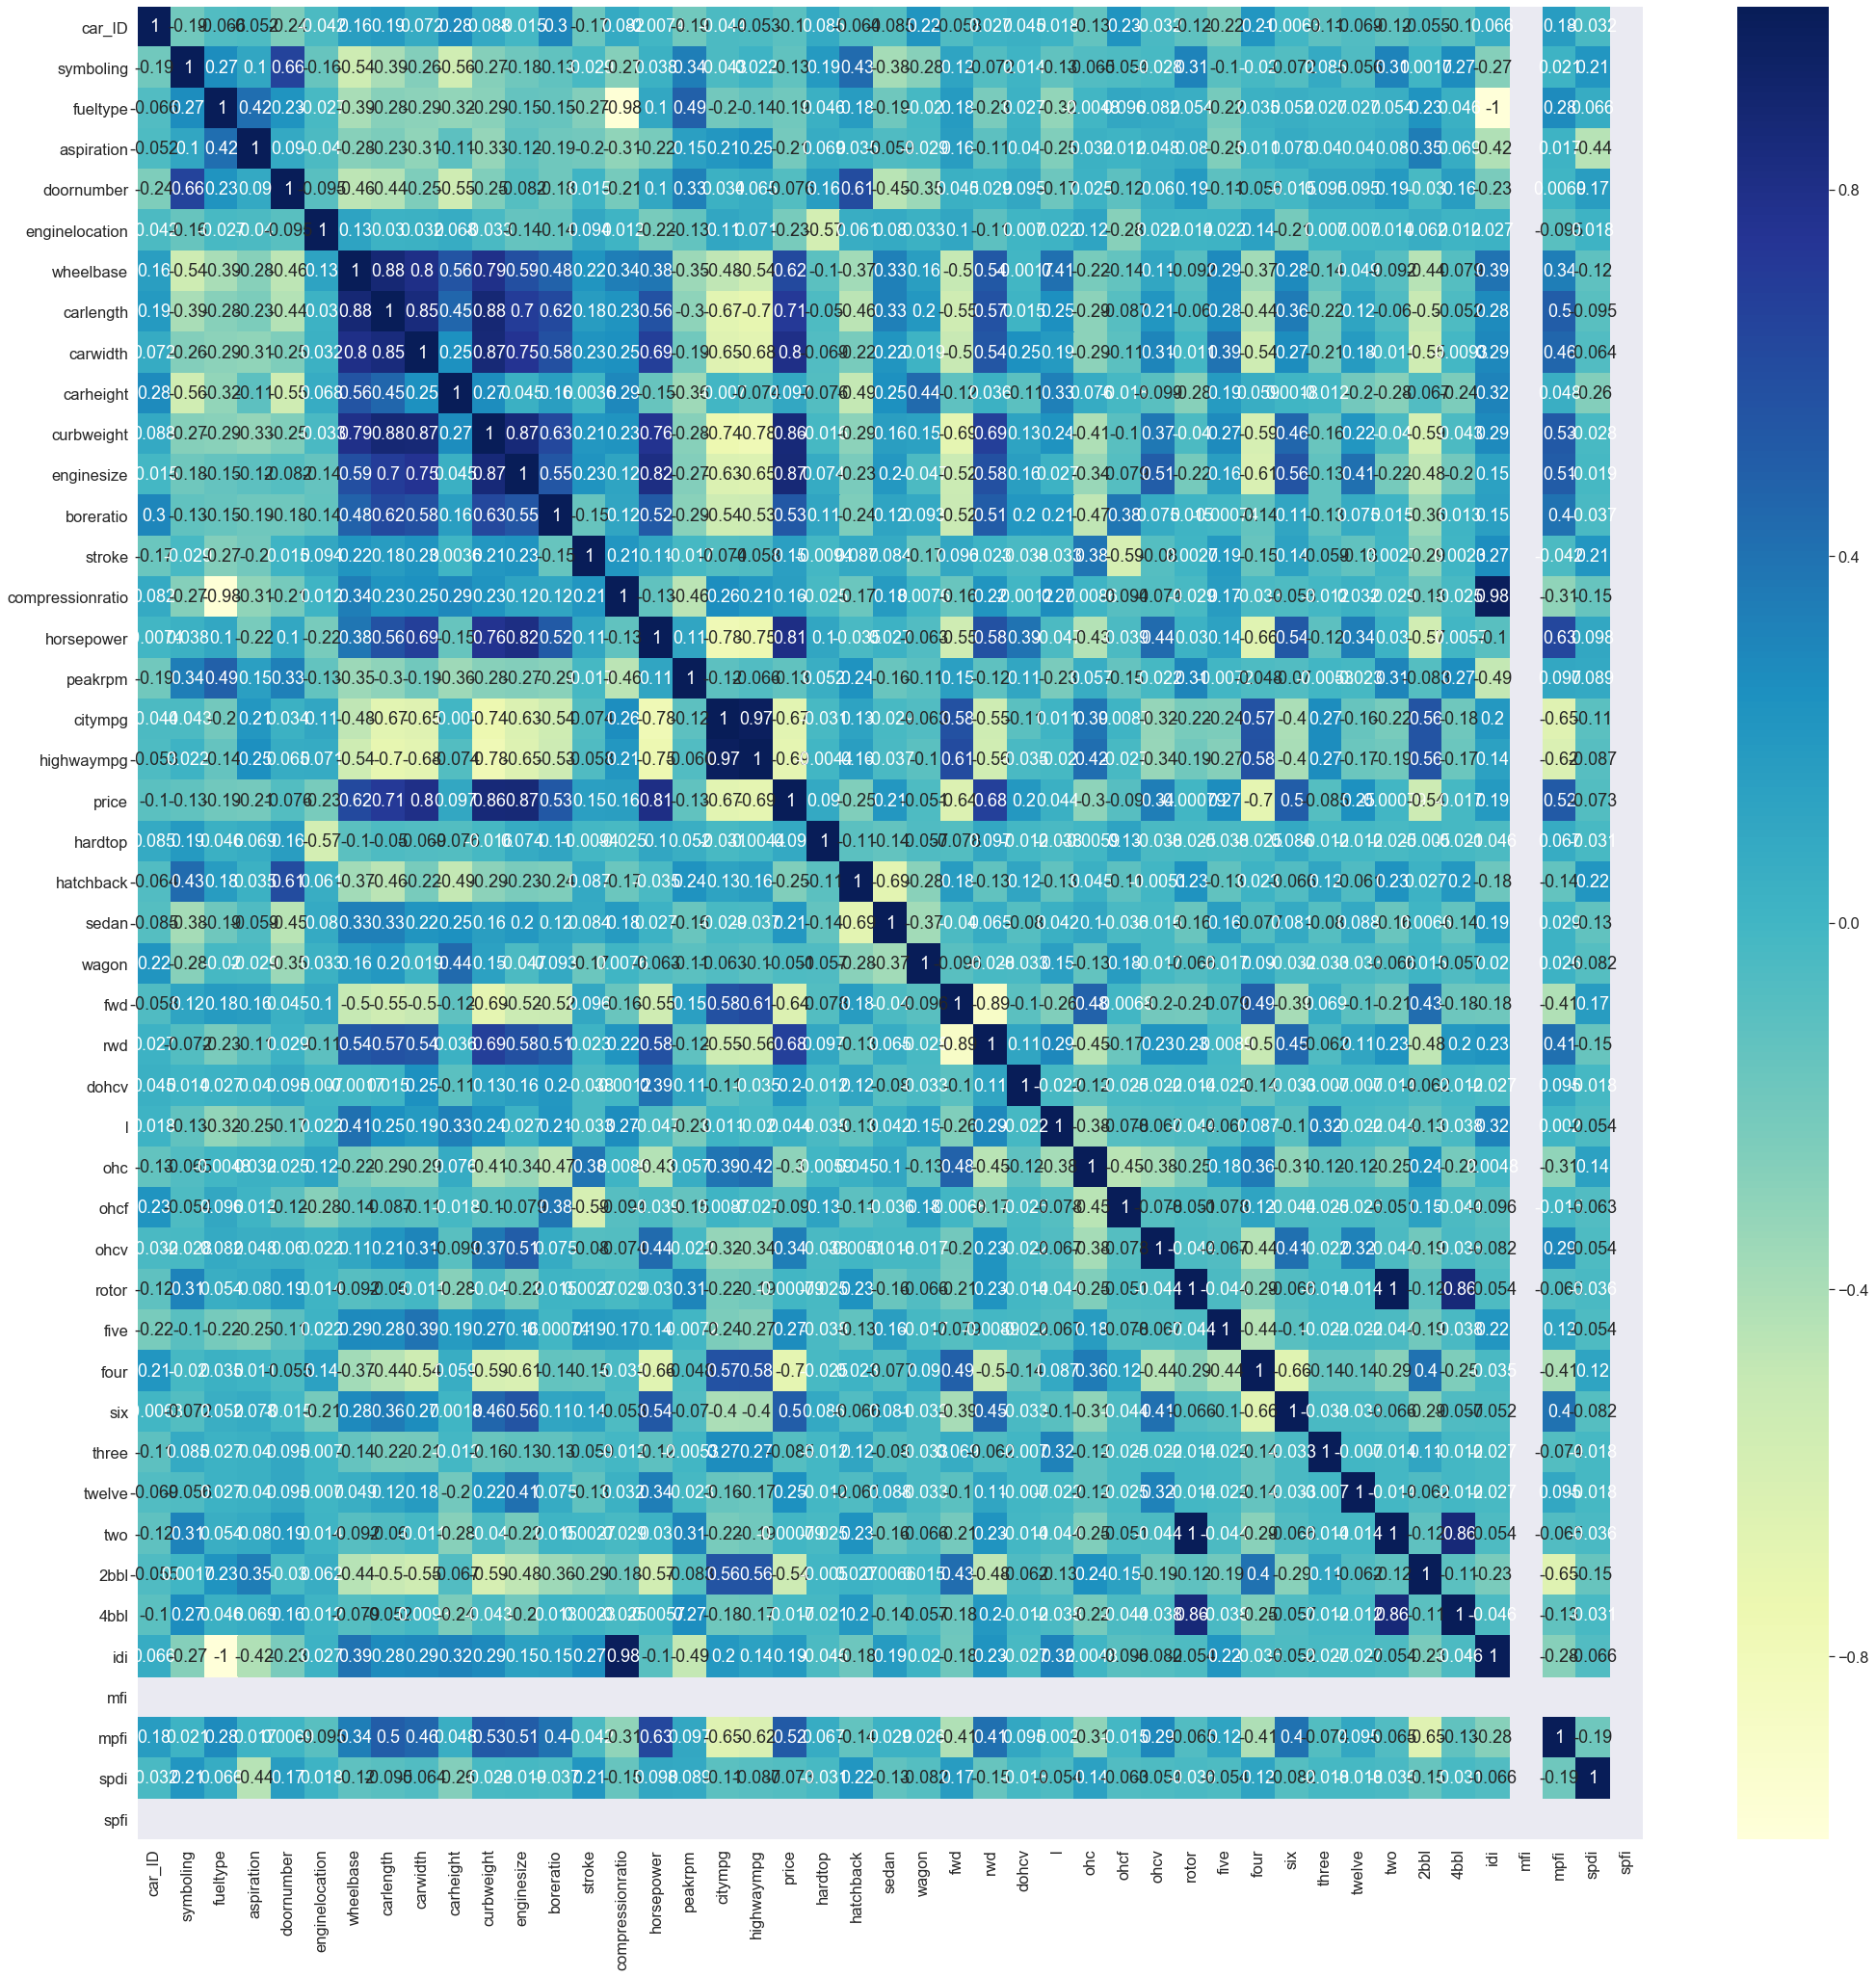

In [18]:
plt.figure(figsize = (35, 35))
sns.set(font_scale=1.5)
sns.heatmap(carDF_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### We can see that car price is highly correlated with the following columns
- wheelbase (.62)
- carlength (.71)
- carwidth (.80)
- curbweight (.86)
- enginesize (.87)
- horsepower (.81)
- rwd (.68)

#### Visualizing the relationships of above columns with price

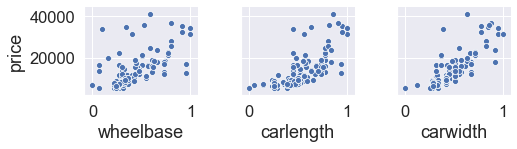

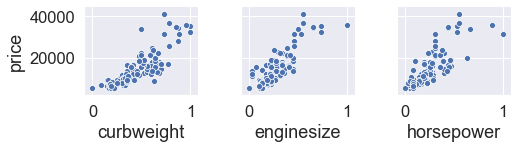

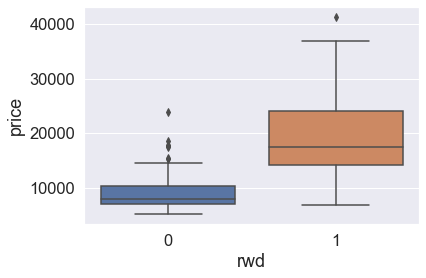

In [19]:
sns.pairplot(data=carDF_train, x_vars=['wheelbase', 'carlength', 'carwidth'], \
            y_vars=['price'])
plt.show()

sns.pairplot(data=carDF_train, x_vars=['curbweight', 'enginesize', 'horsepower'], \
            y_vars=['price'])
plt.show()

sns.boxplot(x = 'rwd', y = 'price', data = carDF_train)
plt.show()

#### Dividing into X and Y sets for the model building
- Enginesize is most correlated variable. We will start building model with this variable

In [20]:
y_train = carDF_train.pop('price')
X_train = carDF_train

# Building a linear model

In [21]:
# Adding a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# First fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [22]:
# Parameters obtained

lr.params

const          2479.658045
enginesize    43822.834040
dtype: float64

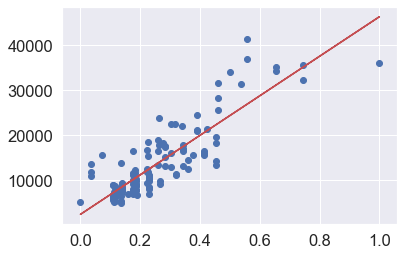

In [23]:
# Visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 2479.65 + 43822.83*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [24]:
# Summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           1.09e-44
Time:                        22:51:53   Log-Likelihood:                -1384.0
No. Observations:                 143   AIC:                             2772.
Df Residuals:                     141   BIC:                             2778.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2479.6580    604.784      4.100      0.0

#### Adding another variable

In [25]:
# Assign the next feature variables to X
X_train_lm = X_train[['enginesize', 'curbweight']]

In [26]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_lm)

# 2nd fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.params)

const           480.684156
enginesize    24547.441288
curbweight    16306.603459
dtype: float64


In [27]:
# Summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           5.31e-50
Time:                        22:51:54   Log-Likelihood:                -1368.2
No. Observations:                 143   AIC:                             2742.
Df Residuals:                     140   BIC:                             2751.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        480.6842    640.641      0.750      0.4

#### We are able to improve the R2 value as well as p-values are significant for both the variable. <br> Next we will add all the feature variables and check our model.

In [28]:
feature_var = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'rwd']
X_train_lm = X_train[feature_var]

In [29]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_lm)

# 3rd fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.params)

const           292.146113
wheelbase       157.697722
carlength     -3475.131220
carwidth      10821.938631
curbweight     5536.238535
enginesize    18873.670110
horsepower     7537.751868
rwd            2868.075073
dtype: float64


In [30]:
# Summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     103.9
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           3.54e-51
Time:                        22:51:54   Log-Likelihood:                -1351.5
No. Observations:                 143   AIC:                             2719.
Df Residuals:                     135   BIC:                             2743.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        292.1461    841.121      0.347      0.7

#### We can see that wheelbase has high p-value i.e. this variable is insignificant and potential candidate to be dropped

#### Before dropping based on p-value lets check the VIF values for the feature variables

In [31]:
# Dataframe with all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = feature_var
vif['VIF'] = [variance_inflation_factor(X_train[feature_var].values, i) for i in range(X_train[feature_var].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

     Features    VIF
3  curbweight  63.10
1   carlength  46.05
2    carwidth  37.80
0   wheelbase  31.89
4  enginesize  18.58
5  horsepower  13.84
6         rwd   3.17


#### We have few columns which are having high VIF and high p-value. <br> We will start with removing high p-value column first and then check the VIF and model again.

In [32]:
X_train_lm = X_train_lm.drop("wheelbase", 1,)

In [33]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_lm)

# 4th fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.params)

const           284.986422
carlength     -3395.205660
carwidth      10882.531745
curbweight     5579.954745
enginesize    18876.962122
horsepower     7453.263012
rwd            2875.518456
dtype: float64


In [34]:
# Summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     122.1
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           3.07e-52
Time:                        22:51:54   Log-Likelihood:                -1351.5
No. Observations:                 143   AIC:                             2717.
Df Residuals:                     136   BIC:                             2738.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        284.9864    824.539      0.346      0.7

In [35]:
# Dataframe with all the feature variables and their respective VIFs
new_feature_var = ['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'rwd']
vif = pd.DataFrame()
vif['Features'] = new_feature_var
vif['VIF'] = [variance_inflation_factor(X_train[new_feature_var].values, i) for i in range(X_train[new_feature_var].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

     Features    VIF
2  curbweight  59.45
0   carlength  37.10
1    carwidth  33.75
3  enginesize  18.57
4  horsepower  10.19
5         rwd   3.02


#### We see "carlength" has high p-value signifying we should remove this column

In [36]:
X_train_lm = X_train_lm.drop("carlength", 1,)

In [37]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_lm)

# 5th fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.params)

const           -97.163792
carwidth       9605.320664
curbweight     2796.970884
enginesize    19281.081313
horsepower     8419.945147
rwd            2891.354921
dtype: float64


In [38]:
# Summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     146.1
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           4.26e-53
Time:                        22:51:55   Log-Likelihood:                -1352.1
No. Observations:                 143   AIC:                             2716.
Df Residuals:                     137   BIC:                             2734.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -97.1638    744.161     -0.131      0.8

In [39]:
# Dataframe with all the feature variables and their respective VIFs
new_feature_var = ['carwidth', 'curbweight', 'enginesize', 'horsepower', 'rwd']
vif = pd.DataFrame()
vif['Features'] = new_feature_var
vif['VIF'] = [variance_inflation_factor(X_train[new_feature_var].values, i) for i in range(X_train[new_feature_var].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

     Features    VIF
1  curbweight  42.88
0    carwidth  22.34
2  enginesize  18.35
3  horsepower   9.38
4         rwd   2.99


#### We still have column, "curbweight", with high p-value signifying we should remove this column too.

In [40]:
X_train_lm = X_train_lm.drop("curbweight", 1,)

In [41]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_lm)

# 6th fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.params)

const           -96.239373
carwidth      11095.041171
enginesize    20785.905671
horsepower     8417.426812
rwd            3147.450843
dtype: float64


In [42]:
# Summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     183.1
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           3.88e-54
Time:                        22:51:55   Log-Likelihood:                -1352.4
No. Observations:                 143   AIC:                             2715.
Df Residuals:                     138   BIC:                             2730.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -96.2394    742.948     -0.130      0.8

In [43]:
# Dataframe with all the feature variables and their respective VIFs
new_feature_var = ['carwidth', 'enginesize', 'horsepower', 'rwd']
vif = pd.DataFrame()
vif['Features'] = new_feature_var
vif['VIF'] = [variance_inflation_factor(X_train[new_feature_var].values, i) for i in range(X_train[new_feature_var].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

     Features    VIF
1  enginesize  13.52
2  horsepower   9.38
0    carwidth   8.04
3         rwd   2.39


#### We still have column, "enginesize", with high VIF signifying this column as highly colinear. So we should remove this column too.

In [44]:
X_train_lm = X_train_lm.drop("enginesize", 1,)

In [45]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_lm)

# 7th fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.params)

const          -387.147569
carwidth      17051.221142
horsepower    18730.109332
rwd            3758.967831
dtype: float64


In [46]:
# Summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     183.4
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           4.03e-48
Time:                        22:51:56   Log-Likelihood:                -1369.6
No. Observations:                 143   AIC:                             2747.
Df Residuals:                     139   BIC:                             2759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -387.1476    833.165     -0.465      0.6

In [47]:
# Dataframe with all the feature variables and their respective VIFs
new_feature_var = ['carwidth', 'horsepower', 'rwd']
vif = pd.DataFrame()
vif['Features'] = new_feature_var
vif['VIF'] = [variance_inflation_factor(X_train[new_feature_var].values, i) for i in range(X_train[new_feature_var].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

     Features   VIF
1  horsepower  6.13
0    carwidth  5.37
2         rwd  2.33


#### We still have column, "horsepower", with high VIF signifying this column as highly colinear. So we should remove this column too.

In [48]:
X_train_lm = X_train_lm.drop("horsepower", 1,)

In [49]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_lm)

# 6th fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.params)

const        -880.406454
carwidth    25904.432274
rwd          5656.630387
dtype: float64


In [50]:
# Summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           6.93e-40
Time:                        22:51:56   Log-Likelihood:                -1392.0
No. Observations:                 143   AIC:                             2790.
Df Residuals:                     140   BIC:                             2799.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -880.4065    967.419     -0.910      0.3

In [51]:
# Dataframe with all the feature variables and their respective VIFs
new_feature_var = ['carwidth', 'rwd']
vif = pd.DataFrame()
vif['Features'] = new_feature_var
vif['VIF'] = [variance_inflation_factor(X_train[new_feature_var].values, i) for i in range(X_train[new_feature_var].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

   Features   VIF
0  carwidth  2.02
1       rwd  2.02


### We now have a model which is having features with all low VIF and low p-value.

# Residual Analysis of the train data

In [52]:
y_train_price = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

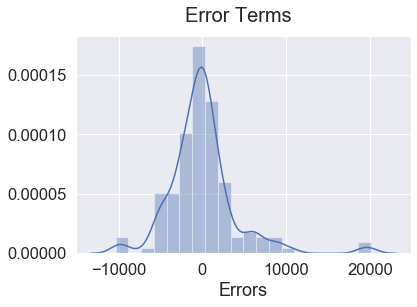

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Predictions Using the Final Model

#### Applying the scaling on the test sets

In [54]:
scaler = MinMaxScaler()
numeric_var = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', \
               'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
carDF_test[numeric_var] = scaler.fit_transform(carDF_test[numeric_var])

carDF_test.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
160,161,0,toyota,1,1,0,1,0.265306,0.341732,0.200000,...,0,0,0,1,0,0,0,0,0,0
186,187,2,volkswagen,1,1,0,1,0.311953,0.426772,0.315789,...,0,0,0,0,0,0,0,1,0,0
59,60,1,mazda,1,1,1,1,0.355685,0.522835,0.421053,...,0,0,0,1,0,0,0,0,0,0
165,166,1,toyota,1,1,1,1,0.230321,0.379528,0.157895,...,0,0,0,0,0,0,0,1,0,0
140,141,2,subaru,1,1,1,1,0.195335,0.200000,0.136842,...,0,0,0,1,0,0,0,0,0,0


#### Dividing into X_test and y_test

In [55]:
y_test = carDF_test.pop('price')
X_test = carDF_test

X_test = X_test[["rwd", "carwidth"]]

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

#### Y prediction

In [56]:
y_pred = lr.predict(X_test)

# Model Evaluation

Text(0, 0.5, 'y_pred')

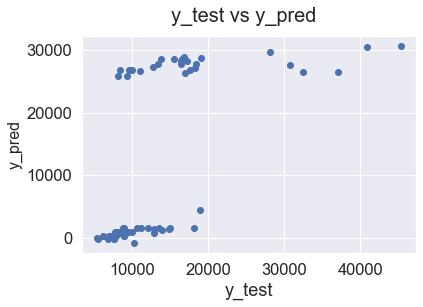

In [57]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

# Equation of the best fitted line

#### price = -880.4065 + (2.59e+04) * carwidth +  (5656.6304) * rwd

#### Here "rwd" signifies that whether the car is of rear wheel drive or not